# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Savva Bogdanov
- Tzung Yu
- Michael Lue
- Jiaqiu Wu
- Zhiheng Wu

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

As second year and higher UCSD students ourselves, we know how off-campus housing can be a logistical nightmare, requiring cooperation from multiple different parties as well as many compromises. High rent prices in the surrounding area for UCSD, as well as the lack of a four-year housing guarantee, exacerbate the issue of finding an appropriate place for rent that’s relatively close to campus, up-to-date, and doesn’t break the bank. We’d like to make this process easier by breaking down what influences housing prices in the UCSD area, not just for those needing off-campus housing because their 2 year guarantee is up but also those who don’t want to be stuck in overcrowded and dingy double and triple dorm rooms for half of their undergraduate education.

# Research Question

-  Include a specific, clear data science question.
-  Make sure what you're measuring (variables) to answer the question is clear

What is your research question? Include the specific question you're setting out to answer. This question should be specific, answerable with data, and clear. A general question with specific subquestions is permitted. (1-2 sentences)

How did different factors influence rental prices in San Diego?
Factors include: distance from shore, university campuses, downtown cities , demand, size, etc.


## Background and Prior Work

### Sources:
1. Robert and Joy Aumann(11 Apr 2024) La Jolla Housing Market (2024 Statistics & Forecast). LuxurySocalRealty. https://www.lajollalife.com/blog/la-jolla-housing-market/

2. Rent price summary for La Jolla, San Diego, CA. Rental Market Trends. https://www.zumper.com/rent-research/san-diego-ca/la-jolla

3. Rent price summary for University City, San Diego, CA. Rental Market Trends. https://www.zumper.com/rent-research/san-diego-ca/university-city

4. https://github.com/COGS108/FinalProjects-Wi20/blob/master/FinalProject_group058.ipynb

Sources 1-3 above show the housing and rental market trends for the La Jolla and University City area near UCSD. According to source 1 above, the median sales price for a La Jolla townhome is $1,275,000 [1], and the graphs show how housing prices have been going up, while availability of homes has been going down since 2019 [1]. We would expect rentals to follow a similar trend. We also noticed that looking at the graph in source 2, the rental market seems to be a lot less steady (price fluctuates a lot more) in La Jolla compared to University City [2][3]. In fact, the website for the La Jolla rental market trends mentions a 55% decrease in prices over the last year[2], while the website for the University City rental market trends mentions only a 6% decrease in prices[3].

We also noticed that a previous COGS 108 project [4], forecasted listing prices for AirBnB listings, which is related to how we will be looking at the different factors for what causes prices to vary in rental listings. The previous project also scraped data that involved certain characteristics of homes like number of bedrooms and how many people the place can accommodate, which is similar to how we will be also investigating rent prices based on location, size, and other parameters specific to a residence.




# Hypothesis



- Include your team's hypothesis
- Ensure that this hypothesis is clear to readers
- Explain why you think this will be the outcome (what was your thinking?)

What is your main hypothesis/predictions about what the answer to your question is? Briefly explain your thinking. (2-3 sentences)

# Data

## Data overview
- Dataset #2 (if you have more than one!)
  - Dataset Name: Listings.csv
  - Link to the dataset: https://data.insideairbnb.com/united-states/ca/san-diego/2024-03-25/data/listings.csv.gz
  - Number of observations: 11496
  - Number of variables: 75

The first dataset, Calendar.csv, provides data on the price of each listing with the date range 03/26/2024 - 03/25/2025. We will be using this dataset to obtain detailed price information for each listing by averaging the prices over all the dates for each listing. The second dataset, Listings.csv, provides detailed information about each property, such as the number of bedrooms and bathrooms, the typical price, and the latitude and longitude, which we will use to determine the price based on the distance from the shoreline.

## Listings.csv Dataset

In [ ]:
# Imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


In [ ]:
url_2 = 'https://github.com/sbogdanov2/publicdatarepo/raw/main/listings.csv'
listings_old = pd.read_csv(url_2)
listings_old.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20240325142647,2024-03-26,city scrape,North Park Craftsmen House * Great for Families,"You read that right, this craftsman home was t...","We have the best Neighborhood in San Diego, in...",https://a0.muscache.com/pictures/miso/Hosting-...,29,...,4.97,4.77,4.80,"STR-04545L, 631067",f,1,1,0,0,0.80
1,29967,https://www.airbnb.com/rooms/29967,20240325142647,2024-03-26,city scrape,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,...,4.93,4.82,4.77,"STR-05218L, 645110",f,5,5,0,0,0.63
2,54001,https://www.airbnb.com/rooms/54001,20240325142647,2024-03-26,city scrape,"La Jolla Cottage, 3Blks 2 Ocean; 2bd1bth, Stei...",NOT AVAILABLE FOR SMOKERS AS THE SMELL OF SMOK...,"Tranquility, stately trees, meditative, zen-fu...",https://a0.muscache.com/pictures/b890172d-9494...,252692,...,4.97,4.97,4.88,"STR-05706L, 523003",f,1,1,0,0,2.02
3,62274,https://www.airbnb.com/rooms/62274,20240325142647,2024-03-26,city scrape,"charming, colorful, close to beach","Modern, cozy, artsy, and european in a lush ga...","We are in walking distance to Starbucks, Trade...",https://a0.muscache.com/pictures/84577734/93ca...,302986,...,4.86,4.87,4.79,"STR-00821L, 520121",f,3,2,1,0,5.38
4,62949,https://www.airbnb.com/rooms/62949,20240325142647,2024-03-26,city scrape,Pacific Beach Cozy Private Hideaway Free Bikes,"Cozy Private Beach Retreat. 420 friendly, we h...","This is the best part of Pacific Beach, we are...",https://a0.muscache.com/pictures/hosting/Hosti...,21532,...,4.95,4.82,4.81,"STR-06358L, 62086",f,2,2,0,0,7.43
5,252289,https://www.airbnb.com/rooms/252289,20240325142647,2024-03-25,city scrape,Private oasis w/ jacuzzi,My Airbnb features a private charming master b...,NaN,https://a0.muscache.com/pictures/b6f9d52a-8577...,861840,...,4.91,4.95,4.74,"STR-07104L, 603701",f,1,1,0,0,3.25
6,289088,https://www.airbnb.com/rooms/289088,20240325142647,2024-03-25,city scrape,"Quiet studio: King bed, AC, Washer","Very centrally located in a quiet, upscale urb...",The neighborhood is eclectic homes nestled int...,https://a0.muscache.com/pictures/78b3e1eb-d3a4...,1501859,...,4.96,4.87,4.76,"STR-02859L, 611101",f,2,2,0,0,2.88
7,293609,https://www.airbnb.com/rooms/293609,20240325142647,2024-03-26,city scrape,Stunning Home -Indoor/Outdoor Style,This beautiful Spanish style house is all you ...,About the Neighborhood:<br /><br />This house ...,https://a0.muscache.com/pictures/19807888/4e30...,1502676,...,4.92,4.87,4.82,"STR-02921L, 613561",f,5,5,0,0,2.56
8,1166766,https://www.airbnb.com/rooms/1166766,20240325142647,2024-03-26,city scrape,Luxury Gated Mission Bay Estate,NaN,NaN,https://a0.muscache.com/pictures/d1226e08-7e26...,6388958,...,4.63,4.87,4.50,"STR-00048L, 621584",f,3,3,0,0,0.24
9,1167130,https://www.airbnb.com/rooms/1167130,20240325142647,2024-03-25,city scrape,Luxury Tuscan Estate,Welcome to the largest home close to Downtown ...,Historic Old Town. Walking distance to numero...,https://a0.muscache.com/pictures/32076565/bef6...,6388958,...,4.80,4.83,4.57,"STR-00538L, 621585",t,3,3,0,0,0.26


In [ ]:
# only include columns that are useful for us, and only include the room type 'entire home/apt', since that is what we're analyzing
listings = listings_old[['host_listings_count', 'host_total_listings_count', 'neighbourhood_cleansed', 'host_name', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']]
listings = listings[listings['room_type'] == 'Entire home/apt']
listings = listings.drop(columns = ['room_type'])
listings.head()

,host_listings_count,host_total_listings_count,neighbourhood_cleansed,host_name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1,1,North Hills,Sara,32.75522,-117.12873,Entire home,6,2.0,3.0,...,2019-09-14,4.81,4.82,4.71,4.99,4.99,4.97,4.77,4.80,0.80
1,6,9,Pacific Beach,Michael,32.80751,-117.25760,Entire bungalow,6,2.0,2.0,...,2024-01-03,4.78,4.74,4.58,4.93,4.93,4.93,4.82,4.77,0.63
2,1,2,La Jolla,Marsha,32.81301,-117.26856,Entire guesthouse,2,1.0,2.0,...,2024-03-17,4.93,4.92,4.94,4.97,4.97,4.97,4.97,4.88,2.02
3,3,3,Pacific Beach,Isabel,32.80583,-117.24244,Entire guesthouse,2,1.0,1.0,...,2024-03-17,4.77,4.86,4.86,4.93,4.93,4.86,4.87,4.79,5.38
4,2,2,Pacific Beach,Lisa,32.80621,-117.23372,Entire guest suite,2,1.0,0.0,...,2024-03-22,4.86,4.91,4.85,4.96,4.96,4.95,4.82,4.81,7.43


In [ ]:
listings = listings.dropna(subset=['price'])

In [ ]:
listings.isnull().sum()

host_listings_count               0
host_total_listings_count         0
neighbourhood_cleansed            0
host_name                         0
latitude                          0
longitude                         0
property_type                     0
accommodates                      0
bathrooms                         0
bedrooms                          7
beds                             16
amenities                         0
price                             0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
first_review                   1254
last_review                    1254
review_scores_rating           1253
review_scores_accuracy         1265
review_scores_cleanliness      1265
review_scores_checkin          1265
review_scores_checkin          1265
review_scores_communication 

In [ ]:
listings = listings.dropna(subset=['bedrooms'])
listings = listings.dropna(subset=['beds'])

In [ ]:
listings.isnull().sum()

host_listings_count               0
host_total_listings_count         0
neighbourhood_cleansed            0
host_name                         0
latitude                          0
longitude                         0
property_type                     0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities                         0
price                             0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
first_review                   1249
last_review                    1249
review_scores_rating           1248
review_scores_accuracy         1260
review_scores_cleanliness      1260
review_scores_checkin          1260
review_scores_checkin          1260
review_scores_communication 

In [ ]:
# need justification for it (potentially because there hasn't been customers yet due to recent dataset)
listings = listings.dropna(subset=['review_scores_value'])

In [ ]:
listings.isnull().sum()

host_listings_count            0
host_total_listings_count      0
neighbourhood_cleansed         0
host_name                      0
latitude                       0
longitude                      0
property_type                  0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
amenities                      0
price                          0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
first_review                   1
last_review                    1
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_pe

In [ ]:
listings[listings['first_review'].isnull()]

,host_listings_count,host_total_listings_count,neighbourhood_cleansed,host_name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
11398,3,33,East Village,Dream Vacation Homes,32.709573,-117.153147,Entire rental unit,10,2.0,2.0,...,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN


In [ ]:
listings = listings.dropna(subset=['first_review'])

In [ ]:
listings.isnull().sum()

host_listings_count            0
host_total_listings_count      0
neighbourhood_cleansed         0
host_name                      0
latitude                       0
longitude                      0
property_type                  0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
amenities                      0
price                          0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
first_review                   0
last_review                    0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_pe

In [ ]:
listings.shape

(8346, 31)

In [ ]:
listings.dtypes

host_listings_count              int64
host_total_listings_count        int64
neighbourhood_cleansed          object
host_name                       object
latitude                       float64
longitude                      float64
property_type                   object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
amenities                       object
price                           object
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
number_of_reviews                int64
number_of_reviews_ltm            int64
number_of_reviews_l30d           int64
first_review                    object
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin    

In [ ]:
#convert individual_price to float type
listings['price'] = listings['price'].str.replace("$","").str.replace(",","")
listings['price'] = listings['price'].astype(float)

# convert bedrooms and beds numbers to int
listings['bedrooms'] = listings['bedrooms'].astype(int)
listings['beds'] = listings['beds'].astype(int)

In [ ]:
listings.dtypes

host_listings_count              int64
host_total_listings_count        int64
neighbourhood_cleansed          object
host_name                       object
latitude                       float64
longitude                      float64
property_type                   object
accommodates                     int64
bathrooms                      float64
bedrooms                         int64
beds                             int64
amenities                       object
price                          float64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
number_of_reviews                int64
number_of_reviews_ltm            int64
number_of_reviews_l30d           int64
first_review                    object
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin    

In [ ]:
# Import csv for shortest distance to shore for each datapoint in listings calculated using MATLAB
shore_dist = pd.read_csv('https://github.com/sbogdanov2/publicdatarepo/raw/main/shore_dist.csv', names = ['shortest_dist'])
# reset index so the new column is integrated properly
listings = listings.reset_index()
listings['shortest_dist_shore'] = shore_dist['shortest_dist']
listings.head()

,index,host_listings_count,host_total_listings_count,neighbourhood_cleansed,host_name,latitude,longitude,property_type,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,shortest_dist_shore
0,0,1,1,North Hills,Sara,32.75522,-117.12873,Entire home,6,2.0,...,4.81,4.82,4.71,4.99,4.99,4.97,4.77,4.80,0.80,3.108604
1,1,6,9,Pacific Beach,Michael,32.80751,-117.25760,Entire bungalow,6,2.0,...,4.78,4.74,4.58,4.93,4.93,4.93,4.82,4.77,0.63,0.399342
2,2,1,2,La Jolla,Marsha,32.81301,-117.26856,Entire guesthouse,2,1.0,...,4.93,4.92,4.94,4.97,4.97,4.97,4.97,4.88,2.02,0.170388
3,3,3,3,Pacific Beach,Isabel,32.80583,-117.24244,Entire guesthouse,2,1.0,...,4.77,4.86,4.86,4.93,4.93,4.86,4.87,4.79,5.38,0.777489
4,4,2,2,Pacific Beach,Lisa,32.80621,-117.23372,Entire guest suite,2,1.0,...,4.86,4.91,4.85,4.96,4.96,4.95,4.82,4.81,7.43,0.856796


In [ ]:
listings['property_type'].value_counts()

property_type
Entire home                  3353
Entire rental unit           1859
Entire condo                 1295
Entire guesthouse             515
Entire guest suite            368
Entire townhouse              270
Entire cottage                226
Entire bungalow               143
Entire loft                    96
Entire villa                   63
Entire serviced apartment      46
Entire vacation home           32
Tiny home                      30
Camper/RV                      19
Entire bed and breakfast        6
Casa particular                 5
Entire place                    5
Room in aparthotel              3
Entire cabin                    3
Farm stay                       2
Boat                            2
Entire resort                   1
Earthen home                    1
Treehouse                       1
Campsite                        1
Barn                            1
Name: count, dtype: int64

In [ ]:
listings = listings[~listings['property_type'].isin(['Entire bed and breakfast', 'Casa particular', 'Entire place', 'Room in aparthotel', 'Farm stay', 'Boat', 'Earthen home', 'Treehouse', 'Campsite', 'Barn', 'Camper/RV', 'Entire cabin', 'Entire resort'])]
listings['property_type'].value_counts()

property_type
Entire home                  3353
Entire rental unit           1859
Entire condo                 1295
Entire guesthouse             515
Entire guest suite            368
Entire townhouse              270
Entire cottage                226
Entire bungalow               143
Entire loft                    96
Entire villa                   63
Entire serviced apartment      46
Entire vacation home           32
Tiny home                      30
Name: count, dtype: int64

In [ ]:
# looking for suspicious prices and hosts
listings[listings['price'] > 4000][['host_name','price']]

,host_name,price
1230,Stew,5000.0
1595,San Diego Sunset,4590.0
3330,Scott,5181.0
4741,WanderJaunt,10000.0
4797,WanderJaunt,10000.0
4798,WanderJaunt,10000.0
4847,WanderJaunt,10000.0
4848,WanderJaunt,10000.0
4875,Robert,4571.0
4965,WanderJaunt,10000.0


In [ ]:
# WonderJaunt is a host that seems to be running scams as the prices are too high for what is provided and the reviews are botted. The rest seem to be legit.
listings = listings[~listings['host_name'].isin(['WanderJaunt'])]
listings[listings['price'] > 4000][['host_name','price']]

,host_name,price
1230,Stew,5000.0
1595,San Diego Sunset,4590.0
3330,Scott,5181.0
4875,Robert,4571.0


In [ ]:
listings = listings.drop(columns = ['host_name'])

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

## First Analysis You Did - Give it a better title

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
#scatter_matrix = pd.plotting.scatter_matrix(listings, figsize=(20, 20))
#for ax in scatter_matrix.ravel():
#  ax.set_xlabel(ax.get_xlabel(), rotation=90)
#  ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')
#plt.suptitle('Relationships Between Variables')
#plt.tight_layout()
#plt.show()

In [ ]:
listings.describe()

,index,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,shortest_dist_shore
count,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,...,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000,8287.000000
mean,5294.918909,37.522143,64.959334,32.768758,-117.191369,5.585495,1.689453,2.062387,3.031978,308.326053,...,4.817228,4.837249,4.807441,4.886662,4.886662,4.890095,4.849039,4.716608,2.015575,1.547744
std,3113.417832,186.412302,271.929272,0.057816,0.064507,3.218587,0.988716,1.387887,2.292368,318.004991,...,0.267239,0.257449,0.270383,0.241554,0.241554,0.230391,0.235212,0.311409,1.987780,2.331178
min,0.000000,1.000000,1.000000,32.542340,-117.281616,1.000000,0.000000,0.000000,0.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.003273
25%,2613.500000,1.000000,2.000000,32.734679,-117.251242,3.000000,1.000000,1.000000,2.000000,138.000000,...,4.750000,4.800000,4.750000,4.880000,4.880000,4.880000,4.810000,4.640000,0.590000,0.219654
50%,5209.000000,4.000000,6.000000,32.761830,-117.200950,5.000000,1.000000,2.000000,2.000000,210.000000,...,4.890000,4.900000,4.880000,4.950000,4.950000,4.960000,4.920000,4.780000,1.600000,0.632996
75%,7909.500000,24.000000,32.000000,32.796357,-117.144930,7.000000,2.000000,3.000000,4.000000,359.000000,...,4.980000,4.980000,4.980000,5.000000,5.000000,5.000000,5.000000,4.890000,3.000000,2.055418
max,11495.000000,4909.000000,5241.000000,33.101790,-116.938790,16.000000,11.000000,12.000000,34.000000,5181.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,55.330000,23.873224


<Axes: xlabel='price', ylabel='Count'>

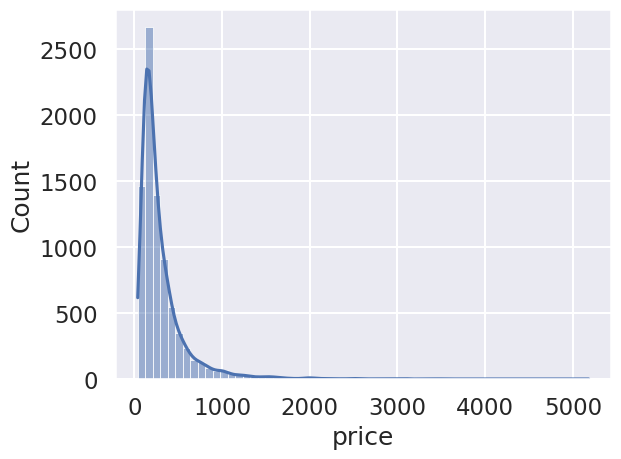

In [ ]:
sns.histplot(listings['price'], bins=60, kde=True)

Text(-117.1611, 32.7157, 'SD')

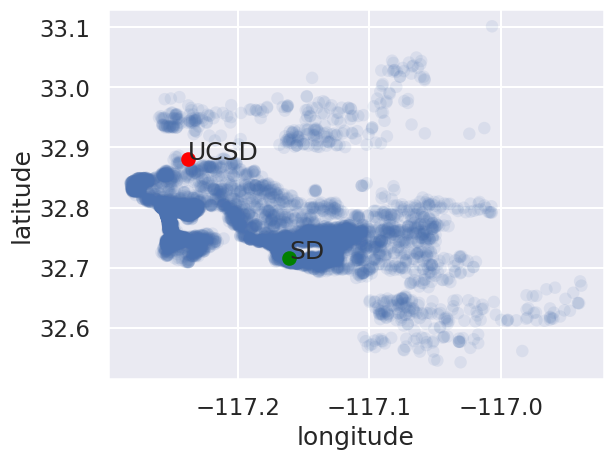

In [ ]:
  sns.scatterplot(data=listings, x='longitude', y='latitude', alpha=0.1, edgecolor = 'none')
  plt.scatter(-117.2376, 32.8807, color = 'red')
  plt.text(-117.2376, 32.8807, 'UCSD')
  plt.scatter(-117.1611, 32.7157, color = 'green')
  plt.text(-117.1611, 32.7157, 'SD')

## Second Analysis You Did - Give it a better title

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
hist_df = listings[['price','neighbourhood_cleansed']]

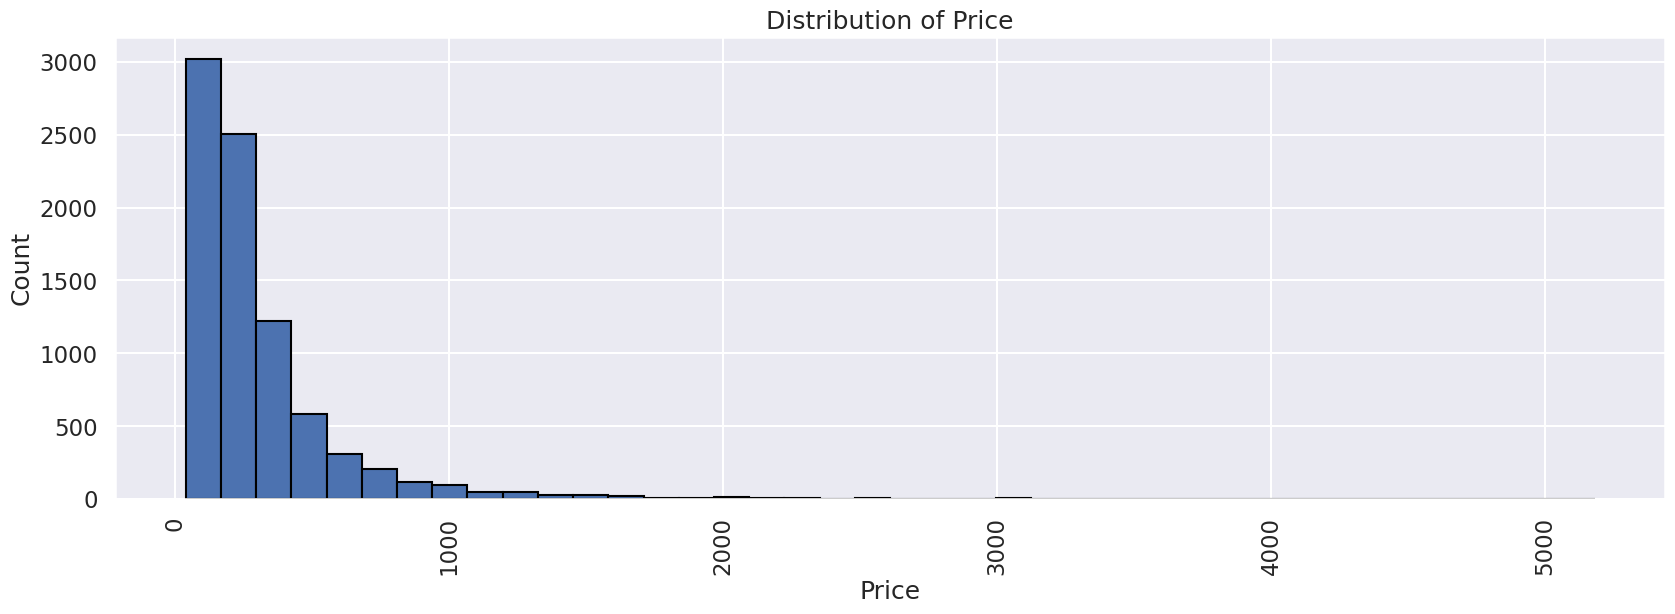

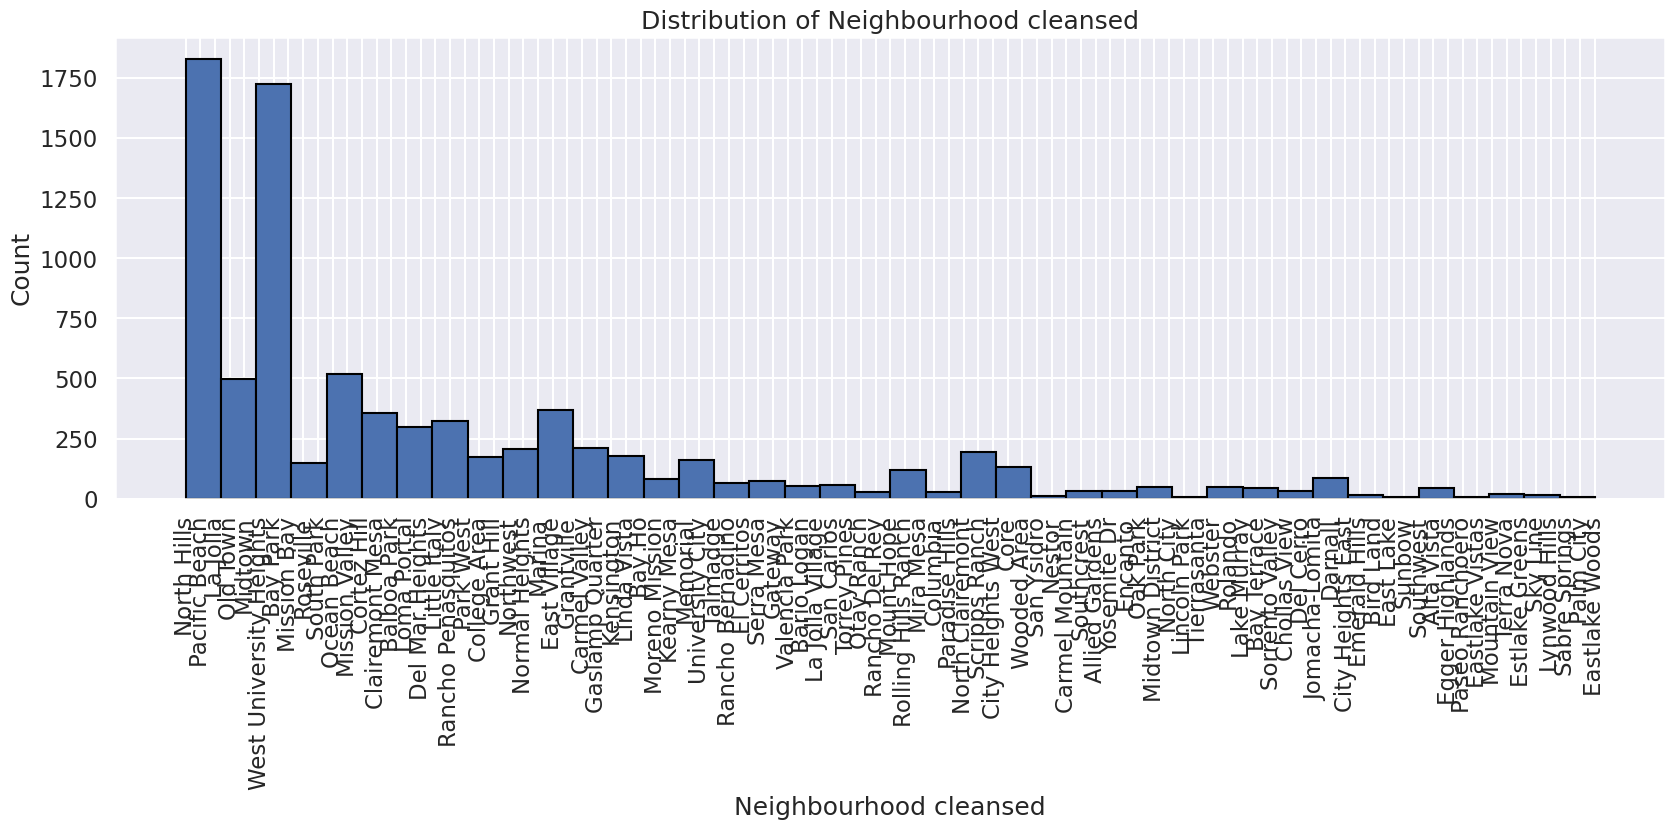

In [ ]:
for variable in hist_df.columns:
    plt.figure(figsize=(20, 6))
    plt.hist(hist_df[variable], bins=40, edgecolor='black')
    plt.xlabel(variable.capitalize().replace('_', ' '))
    plt.ylabel('Count')
    plt.title(f'Distribution of {variable.capitalize().replace("_", " ")}')
    plt.xticks(rotation=90)
    plt.show()

##Analysis

In [ ]:
listings.columns

Index(['index', 'host_listings_count', 'host_total_listings_count',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'shortest_dist_shore'],
      dtype='object')

In [ ]:
listings = listings.drop(columns=['index', 'host_listings_count'])

In [ ]:
listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Mission Bay       1469
Pacific Beach      781
La Jolla           632
Ocean Beach        502
North Hills        416
                  ... 
Terra Nova           1
Estlake Greens       1
Lincoln Park         1
Yosemite Dr          1
Eastlake Woods       1
Name: count, Length: 97, dtype: int64

In [ ]:
neighborhoods = listings['neighbourhood_cleansed'].value_counts()[listings['neighbourhood_cleansed'].value_counts()>50]
neighborhoods = neighborhoods.index.tolist()
neighborhoods

['Mission Bay',
 'Pacific Beach',
 'La Jolla',
 'Ocean Beach',
 'North Hills',
 'Midtown',
 'East Village',
 'Loma Portal',
 'Old Town',
 'Balboa Park',
 'Gaslamp Quarter',
 'Park West',
 'Bay Park',
 'Little Italy',
 'Normal Heights',
 'City Heights West',
 'Grant Hill',
 'West University Heights',
 'University City',
 'Clairemont Mesa',
 'Cortez Hill',
 'Northwest',
 'Core',
 'Mira Mesa',
 'Linda Vista',
 'Roseville',
 'South Park',
 'Moreno Mission',
 'Serra Mesa',
 'Bay Ho',
 'Memorial',
 'North Clairemont',
 'Del Mar Heights',
 'College Area',
 'Wooded Area']

In [ ]:
neighborhood_map = dict(zip(neighborhoods, np.arange(len(neighborhoods))))

In [ ]:
listings = listings[listings['neighbourhood_cleansed'].isin(neighborhoods)]
listings['neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].map(neighborhood_map)

In [ ]:
property_types = listings['property_type'].value_counts().index.tolist()
property_map = dict(zip(property_types, np.arange(len(property_types))))
listings['property_type'] = listings['property_type'].map(property_map)

In [ ]:
top_amenities = ['Wifi', 'Refrigerator', 'Cooking basics', 'Washer', 'Dryer', 'Heating', 'Hot water', 'TV with standard cable', 'Microwave', 'Free street parking', 'Self check-in']
#listings['amenities'] = listings['amenities'].map(lambda x: len(set(x).intersection(set(top_amenities)))/10)
#listings['amenities']

In [ ]:
def string_to_list(x):
  l = x[1:-1].replace('"', '').split(",")
  return len(set(list(map(lambda x: x.strip(" "), l))).intersection(set(top_amenities)))/11

listings['amenities'] = listings['amenities'].apply(string_to_list)

In [ ]:
listings.columns

Index(['host_total_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'shortest_dist_shore'],
      dtype='object')

In [ ]:
now = pd.to_datetime("2024-06-09")
first = listings['first_review'].map(lambda t: (now - pd.to_datetime(t)).days/365)
last = listings['last_review'].map(lambda t: (now - pd.to_datetime(t)).days/365)

In [ ]:
listings['time_from_first_review'] = first
listings['time_from_last_review'] = last

In [ ]:
listings = listings.drop(columns=['first_review', 'last_review'])

In [ ]:
listings.dtypes

host_total_listings_count        int64
neighbourhood_cleansed           int64
latitude                       float64
longitude                      float64
property_type                    int64
accommodates                     int64
bathrooms                      float64
bedrooms                         int64
beds                             int64
amenities                      float64
price                          float64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
number_of_reviews                int64
number_of_reviews_ltm            int64
number_of_reviews_l30d           int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value      

In [ ]:
listings = listings.reset_index()

In [ ]:
neighbourhood_dummies = 1 * pd.get_dummies(listings['neighbourhood_cleansed'])

In [ ]:
neighbourhood_columns = [f"n{i}" for i in neighbourhood_dummies.columns]
neighbourhood_dummies.columns = neighbourhood_columns

In [ ]:
property_type_dummies = 1 * pd.get_dummies(listings['property_type'])

property_type_columns = [f"p{i}" for i in property_type_dummies.columns]
property_type_dummies.columns = property_type_columns

In [ ]:
listing_numeric = pd.concat([listings, neighbourhood_dummies, property_type_dummies], axis=1)

In [ ]:
listing_numeric

,index,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,...,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,0,1,4,32.755220,-117.128730,0,6,2.0,3,3,...,0,0,0,0,0,0,0,0,0,0
1,1,9,1,32.807510,-117.257600,7,6,2.0,2,3,...,0,0,0,0,1,0,0,0,0,0
2,2,2,2,32.813010,-117.268560,3,2,1.0,2,6,...,1,0,0,0,0,0,0,0,0,0
3,3,3,1,32.805830,-117.242440,3,2,1.0,1,1,...,1,0,0,0,0,0,0,0,0,0
4,4,2,1,32.806210,-117.233720,4,2,1.0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,8341,83,2,32.829210,-117.276120,5,6,2.5,2,3,...,0,0,1,0,0,0,0,0,0,0
7290,8342,9,18,32.851480,-117.212476,0,10,4.5,4,4,...,0,0,0,0,0,0,0,0,0,0
7291,8343,7,30,32.705560,-117.138950,0,3,1.0,1,1,...,0,0,0,0,0,0,0,0,0,0
7292,8344,2,0,32.766077,-117.251969,0,6,2.0,3,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
listing_numeric = listing_numeric.drop(columns = ['index', 'longitude', 'latitude'])

# Ethics & Privacy

In our case, we are researching the effect of location and other parameters on property prices. Rather than focusing on private data that could become leaked (for example, the owners and current residents of a property), we are planning to use only publicly available information and datasets that list specific parameters of a property such as size and relative location of said property. While the use of specific addresses may be a concern to some, we will be using this only to identify the location and will not attribute this to anyone who lives there or may have lived there. Like the recommendation algorithms used by TikTok, we consider all the information we gather as a symbol, instead of matching the address, for example, with a specific family. If not, that would be dangerous, but we deliberately avoid that situation. It would also be helpful to account for specific biases in the area we research, such as identifying if it could be considered a “marginalized community” and ensure that we research properties from a wide range of locations in the region we are interested in.


# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff.


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.